# Multi-modal generation for training classifiers
UNIST 23S AI518 Deep Generative Models Final Project


In [1]:
# define library
import os
import yaml

import numpy as np
import torch
import matplotlib.pyplot as plt

from models.modelutils import get_model
from utils.logging import load_model, exp_str

%matplotlib inline

/home/ayp/.conda/envs/multimodalvae/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_DIR = '/syn_mnt/uyoung/2023_spring_generative_model/multi-modal-vae/saves/'
config_DIR = '/syn_mnt/uyoung/2023_spring_generative_model/multi-modal-vae/configs/'
save_DIR = model_DIR


#model_file = 'cvae_MNIST_CVAE_alpha_entropy.pt'; config_file = 'cvae_mnist_clsmin.yml'; save_file = 'cvae_MNIST_CVAE_alpha_entropy/generated_data.pt'
#model_file = 'cvae_MNIST_CVAE_alpha_clsmin.pt'; config_file = 'cvae_mnist_clsmin.yml'; save_file = 'cvae_MNIST_CVAE_alpha_clsmin/generated_data.pt'
#model_file = 'cvae_CIFAR10_CVAE_alpha_entropy.pt'; config_file = 'cvae_cifar10_entropy.yml'; save_file = 'cvae_CIFAR10_CVAE_alpha_entropy/generated_data.pt'
#model_file = 'cvae_CIFAR10_CVAE_alpha_clsmin.pt'; config_file = 'cvae_cifar10_clsmin.yml'; save_file = 'cvae_CIFAR10_CVAE_alpha_clsmin/generated_data.pt'
model_file = 'cvae_CIFAR100_CVAE_alpha_entropy.pt'; config_file = 'cvae_cifar100_entropy.yml'; save_file = 'cvae_CIFAR100_CVAE_alpha_entropy/generated_data.pt'
#model_file = 'cvae_CIFAR100_CVAE_alpha_clsmin.pt'; config_file = 'cvae_cifar100_clsmin.yml'; save_file = 'cvae_CIFAR100_CVAE_alpha_clsmin/generated_data.pt'

model_PATH = os.path.join(model_DIR, model_file)
config_PATH = os.path.join(config_DIR, config_file)
save_PATH = os.path.join(save_DIR, save_file)

In [3]:
with open(config_PATH, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

# Set random seed
seed = config['seed']
torch.manual_seed(seed)
np.random.seed(seed)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = get_model(config)
model_type = 'vae' if config['MODEL']['name'] == 'VAE' else 'cvae'
data_name = config['DATA']['name']

model.load_state_dict(torch.load(model_PATH))
model.to(device)

# load generated data
generated_data = torch.load(save_PATH)
X = generated_data['x']
y = generated_data['y']

In [4]:
num_samples = y.shape[0]
num_labels = 10
if data_name == 'cifar100':
    num_labels = 100
per_row = 10
sample_per_label = num_samples // num_labels

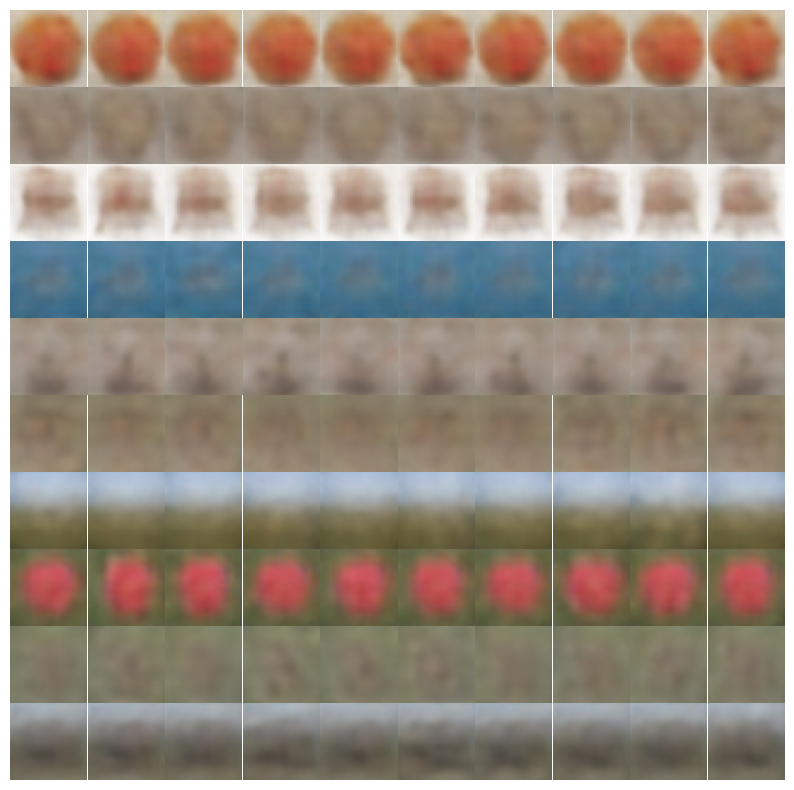

In [5]:
# plot generated data
fig, ax = plt.subplots(num_labels, per_row, figsize=(per_row, num_labels))
for i in range(num_labels):
    for j in range(per_row):
        img = X[i * sample_per_label + j].cpu().detach().numpy()
        
        if data_name.lower() == 'mnist':
            ax[i, j].imshow(img, cmap='gray')
        else:
            ax[i, j].imshow(img)
        ax[i, j].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [6]:
model_file = 'vae_vanilla_MNIST_VAEVanilla_alpha_4.pt'; config_file = 'mnist_vanilla.yml'; save_file = 'vae_vanilla_MNIST_VAEVanilla_alpha_4/generated_data.pt'
#model_file = 'vae_vanilla_CIFAR10_VAEVanilla_alpha_ldim32.pt'; config_file = 'cifar10_vanilla.yaml'; save_file = 'vae_vanilla_CIFAR10_VAEVanilla_alpha/generated_data.pt'
#model_file = 'vae_vanilla_CIFAR100_VAEVanilla_alpha.pt'; config_file = 'cifar100_vanilla.yaml'; save_file = 'vae_vanilla_CIFAR100_VAEVanilla_alpha/generated_data.pt'

model_PATH = os.path.join(model_DIR, model_file)
config_PATH = os.path.join(config_DIR, config_file)
save_PATH = os.path.join(save_DIR, save_file)

In [7]:

with open(config_PATH, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

# Set random seed
seed = config['seed']
torch.manual_seed(seed)
np.random.seed(seed)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = get_model(config)
model_type = 'vae' if config['MODEL']['name'] == 'VAE' else 'cvae'
data_name = config['DATA']['name']

model.load_state_dict(torch.load(model_PATH))
model.to(device)

# load generated data
generated_data = torch.load(save_PATH)
X = generated_data['x']
y = generated_data['y']

num_samples = y.shape[0]
num_labels = 10
if data_name == 'cifar100':
    num_labels = 100
per_row = 10
sample_per_label = num_samples // num_labels

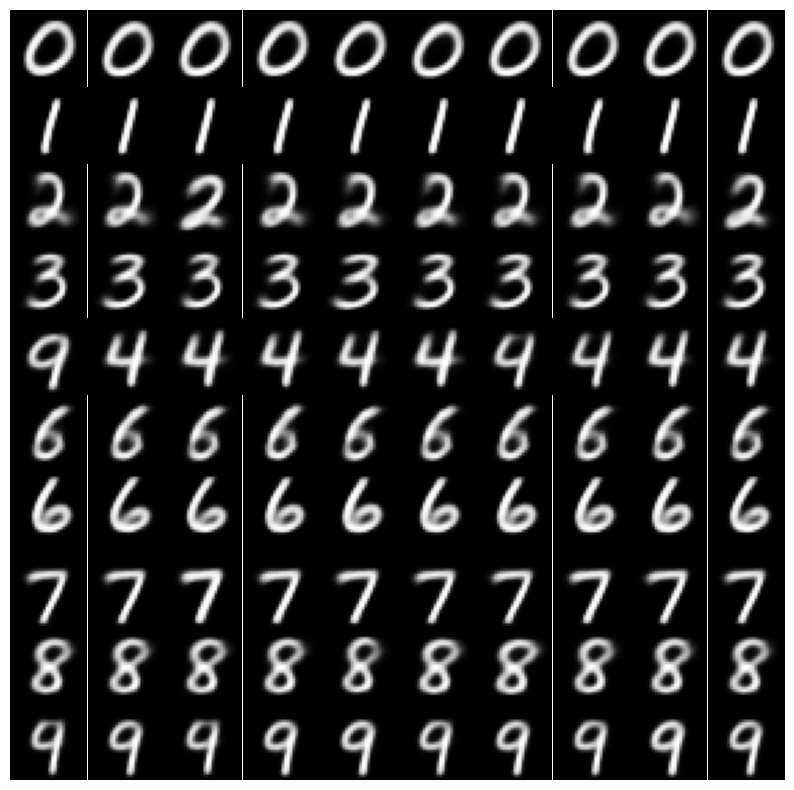

In [8]:
# plot generated data
fig, ax = plt.subplots(num_labels, per_row, figsize=(per_row, num_labels))
for i in range(num_labels):
    for j in range(per_row):
        # random sample
        idx = np.random.randint(0, num_samples)
        img = X[i * sample_per_label + j].cpu().detach().numpy()
        
        if data_name == 'MNIST':
            ax[i, j].imshow(img, cmap='gray')
        else:
            ax[i, j].imshow(img)
        ax[i, j].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()